#**Credit Score Prediction**



Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
df = pd.read_csv('/content/Credit_Score_Clean.csv')

In [3]:
df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,3,4,3,4,5,4,6.27,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
1,23,Scientist,19114.12,3,4,3,4,6,0,11.27,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
2,23,Scientist,19114.12,3,4,3,4,3,8,11.27,...,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
3,23,Scientist,19114.12,3,4,3,4,3,6,11.27,...,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard,0
4,28,Teacher,34847.84,2,4,6,1,7,1,7.42,...,Good,605.03,38.550848,No,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good,320


Feature Engineering

In [26]:
# Convert target into binary classification (1 = Good/Standard, 0 = Poor)

# Inspect unique values before transformation
print("Unique Credit_Score values before transformation:")
print(df['Credit_Score'].unique())
print("Value counts before transformation:")
print(df['Credit_Score'].value_counts())

# Strip whitespace from Credit_Score column to ensure clean matching
df['Credit_Score'] = df['Credit_Score'].astype(str).str.strip()

# Apply the transformation
df['Credit_Score'] = df['Credit_Score'].apply(lambda x: 1 if x in ['Good', 'Standard'] else 0)

# Now you have a binary classification target variables
print("\nUnique Credit_Score values after transformation:")
print(df['Credit_Score'].unique())
print("Value counts after transformation:")
print(df['Credit_Score'].value_counts())

Unique Credit_Score values before transformation:
[0]
Value counts before transformation:
Credit_Score
0    31711
Name: count, dtype: int64

Unique Credit_Score values after transformation:
[0]
Value counts after transformation:
Credit_Score
0    31711
Name: count, dtype: int64


In [10]:
df.sample(5)

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
10527,20,8,40216.62,0,5,10,2,9,2,8.02,...,1,323.03,41.306395,1,41.665473,228.227054,5,381.145973,0,322
4920,29,5,25355.14,8,4,12,3,9,8,4.49,...,2,172.56,24.979652,1,38.234833,98.591399,3,321.066601,0,183
11678,26,4,21613.57,4,7,18,7,18,14,18.42,...,2,878.38,34.846979,2,99.974141,64.937552,4,286.701390,0,173
5206,34,12,76338.68,4,6,19,1,11,8,12.18,...,2,965.06,26.910447,2,52.630065,451.932454,2,416.293148,0,0
11992,29,12,85486.14,6,4,13,3,28,8,5.01,...,2,380.26,28.311356,2,177.172430,97.906257,0,706.105813,0,0


Model Training

Scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
df = pd.read_csv('/content/Credit_Score_Clean.csv')

In [31]:
selected_features = [
    'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
    'Delay_from_due_date', 'Interest_Rate', 'Num_Credit_Card',
    'Num_Bank_Accounts', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Num_of_Loan', 'Outstanding_Debt', 'Occupation'
]

X = df[selected_features]
y = df['Credit_Score']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

Model Training & Evaluation

In [43]:
best_model = None
best_model_name = ""
best_accuracy = 0.0

print("\nModel Performance Summary:\n")

for name, model in models.items():
    # Cross-validation accuracy (5 folds)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_accuracy = np.mean(cv_scores)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Test accuracy
    y_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Check if current model is the best
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_name = name
        best_model = model  # Store the model object

    # Print results exactly in your format
    print(f"Model: {name}")
    print(f"Cross-validation Accuracy: {cv_accuracy}")
    print(f"Test Accuracy: {test_accuracy}\n")


Model Performance Summary:

Model: Logistic Regression
Cross-validation Accuracy: 0.8754730714772829
Test Accuracy: 0.8795522623364339

Model: Decision Tree
Cross-validation Accuracy: 0.8689293974507468
Test Accuracy: 0.8749802932366388

Model: Random Forest
Cross-validation Accuracy: 0.9125278851511333
Test Accuracy: 0.9132902412107835

Model: Gradient Boosting
Cross-validation Accuracy: 0.8893094676609946
Test Accuracy: 0.8948447107047138



Model Evaluation

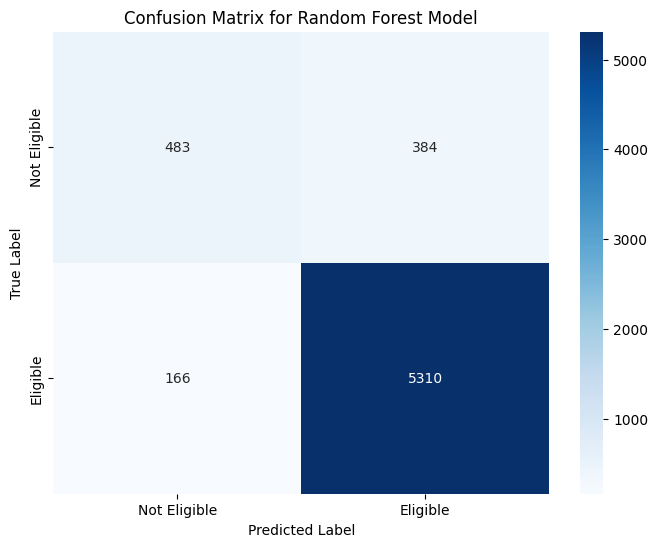

In [37]:
# prompt: draw a confusion matrix of my models results

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_pred' contains the predictions from your best model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Eligible', 'Eligible'],
            yticklabels=['Not Eligible', 'Eligible'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Save Best Model

In [38]:
import pickle
pickle.dump(best_model, open('01_credit_scoring_model.pkl', 'wb'))

In [40]:
import pickle

# Sample data for prediction where the model predicts the user should be given a loan
sample_data = pd.DataFrame({
    'Credit_Mix': [2],
    'Payment_of_Min_Amount': [1],
    'Payment_Behaviour': [0],
    'Delay_from_due_date': [10],
    'Interest_Rate': [10.5],
    'Num_Credit_Card': [3],
    'Num_Bank_Accounts': [5],
    'Changed_Credit_Limit': [1],
    'Num_Credit_Inquiries': [2],
    'Num_of_Loan': [2],
    'Outstanding_Debt': [5000],
    'Occupation': [2]
})

# Load the saved model
loaded_model = pickle.load(open('01_credit_scoring_model.pkl', 'rb'))

# Make prediction
prediction = loaded_model.predict(sample_data)

if prediction[0] == 1:
  print("User should be given a loan.")
else:
  print("User should not be given a loan.")

User should not be given a loan.


In [44]:
print(f"\n Best Model: {best_model_name}")


 Best Model: Random Forest
